<a href="https://colab.research.google.com/github/envomp/2020-Text-Mining/blob/master/week2/Quantitative_measures_of_text_complexity_for_the_Independence_Day_speeches_of_the_Presidents_of_the_Republic_of_Estonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
!pip install conllu estnltk==1.6.7b0
!wget --recursive --no-parent 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Regular.ttf' -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
!wget --recursive --no-parent 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Light.ttf' -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
!wget --recursive --no-parent 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-SemiBold.ttf' -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
!wget --recursive --no-parent 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Bold.ttf' -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf

     |████████████████████████████████| 194kB 6.3MB/s 
  Created wheel for ujson: filename=ujson-1.35-cp36-cp36m-linux_x86_64.whl size=68040 sha256=3ba88b549d75a3199ea6721163f5e5b3cb24fb9d5fdc9522b873fe0e2b5561b3
  Stored in directory: /root/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built ujson
--2020-09-10 12:34:27--  https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Regular.ttf
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/fonts/master/apache/opensans/OpenSans-Regular.ttf [following]
--2020-09-10 12:34:28--  https://raw.githubusercontent.com/google/fonts/master/apache/opensans/OpenSans-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubuser

Abifunktsioon jooniste tegemiseks

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
mpl.font_manager._rebuild()
mpl.rc('figure', figsize=(12, 5))

def plot_data(year, result, header):
  plt.rc('font', family='Open Sans')
  fig, ax = plt.subplots()

  # Save the chart so we can loop through the bars below.
  bars = ax.bar(
      x=[occurances[0] for occurances in result],
      height=[occurances[1] for occurances in result]
  )

  # Axis formatting.
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_color('#DDDDDD')
  ax.tick_params(bottom=False, left=False)
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, color='#EEEEEE')
  ax.xaxis.grid(False)

  # Add text annotations to the top of the bars.
  bar_color = bars[0].get_facecolor()
  for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.3,
        round(bar.get_height(), 1),
        horizontalalignment='center',
        color=bar_color,
        weight='bold'
    )

  # Add labels and a title.
  ax.set_xlabel('Enim kasutatavad sõnad', labelpad=15, color='#333333')
  ax.set_ylabel('Sõnade esinemiste arv', labelpad=15, color='#333333')
  ax.set_title(f'{header} [{year}]', pad=15, color='#333333',
              weight='bold')

  fig.tight_layout()

Esmalt loeb failid listi ning viib nad paremini käideltatavale kujule

In [53]:
from estnltk import Text
from html import unescape
import re

sample_data = [
    ("Kersti Kaljuraid", ["2020.txt", "2019.txt", "2018.txt"]),
    ("Toomas Hendrik Ilves", ["2016.txt", "2015.txt", "2014.txt"]),
    ("Arnold Rüütel", ["2006.txt", "2005.txt", "2004.txt"]),
    ("Lennart Meri", ["2001.txt", "2000.txt", "1999.txt"])
]

def formatted_data(filename):
  return open(filename, "r").read()

texts = [
    (
      name, 
      Text("\n\n\n".join([formatted_data(filename) for filename in filenames])).analyse('all')
    ) for name, filenames in sample_data
]

texts

[('Kersti Kaljuraid',
  Text(text='Karuldasa jänelevad loomad\n\nJänestisse kareldavad end\n\nKarustavad jänelmu ja loovad\n\nJäneskarust kõrgemale end.\n\nSelline väike kokkuvõte eelmise aasta kulgemisest. Nii, nagu asjad tegelikult on. Kui see aga kellelegi tema vaatepunktist või ka enesekohaselt kuidagi ebaõiglane tundus, siis palun – võib ka täpselt vastupidi:\n\nJäneldasa karulduvad loomad\n\nKarutsedes jänkustavad end\n\nJänestavad karulmu ja loovad\n\nKarujäntsist kõrgemale end.\n\nHead Eesti inimesed kõikides kodudes!\n\nKallid külalised!\n\nLuule roll me elus ongi tänamatult täpselt sõnastada seda, mida üks kõnetekst iialgi ei suuda. Tänan Sind, Valdur Mikita, mu tänast kimbatust kirjeldamast. Eelmise poliitika-aasta olemust maha vaikida ei saa, kuid mu enda sulg on täpseks kirjeldamiseks liig nõrk ning hing väljanaermiseks liig hell. On olnud haiget tegemise aasta.\n\nTulgu järgmine helgem!\n\nAga oli ka eesti keele aasta. Jätkugu meil armastust oma keele vastu ka edaspidi ni

 Flesch Reading Ease Score(FRES) skoor
 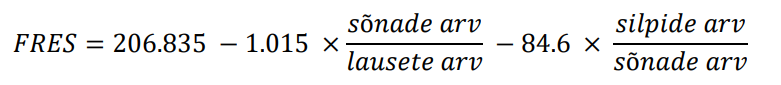

In [72]:
def count_syllables(word: str) -> int:
    syllable_count = 0
    vowels = "aeiouõäöü"
    if word[0] in vowels:
        syllable_count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            syllable_count += 1
    if syllable_count == 0:
        syllable_count += 1
    return syllable_count

In [116]:
import re

def get_fres(text):
  actual_words = list(filter(lambda x: re.match(r"^\w+$", x.text), text.words))
  words = len(actual_words)
  sentences = len(text.sentences)
  syllables = sum([count_syllables(x.text) for x in actual_words])
  return round(206.835 - 1.015 * words / sentences - 84.6 * syllables / words, 2)

def get_fres_1_sentence(words):
  actual_words = list(filter(lambda x: re.match(r"^\w+$", x.text), words))
  words = len(actual_words)
  syllables = sum([count_syllables(x.text) for x in actual_words])
  return round(206.835 - 1.015 * words - 84.6 * syllables / words, 2)


Gunning FOG:

- Keerulised sõnad koosnevad kolmest või enamast silbist
- Loendatakse vaid sõnatüve silpe
- Liitsõna loetaks keeruliseks, kui vähemalt üks selle osa on kolmesilbiline
- Keerukaks ei loeta nimesid ja lühendeid

In [117]:
import re

def get_gunning_fog(text):
  actual_words = list(filter(lambda x: re.match(r"^\w+$", x.text), text.words))
  words = len(actual_words)
  sentences = len(text.sentences)
  difficult_words = sum([count_syllables(x.root) >= 3 for x in actual_words])
  return round(0.4 * words / sentences + 100 * difficult_words / words, 2)

def get_gunning_fog_1_sentence(words):
  actual_words = list(filter(lambda x: re.match(r"^\w+$", x.text), words))
  words = len(actual_words)
  difficult_words = sum([count_syllables(x.root) >= 3 for x in actual_words])
  return round(0.4 * words + 100 * difficult_words / words, 2)


In [111]:
for president, text in texts:
  print(f"president: {president} - FRES: {get_fres(text)}")
  print(f"president: {president} - Gunning FOG: {get_gunning_fog(text)}")
  print()

president: Kersti Kaljuraid - FRES: -2.27
president: Kersti Kaljuraid - Gunning FOG: 5.04

president: Toomas Hendrik Ilves - FRES: -2.38
president: Toomas Hendrik Ilves - Gunning FOG: 4.48

president: Arnold Rüütel - FRES: -32.72
president: Arnold Rüütel - Gunning FOG: 5.55

president: Lennart Meri - FRES: -19.45
president: Lennart Meri - Gunning FOG: 5.13



FRES test ei anna meile hetkel teksti keerukuse taset, kuna test pole kohandatud Eesti keele jaoks. Aga see-eest annab võrdluspunkti. Rüütli tekst oli kõige keerulisem aru saadav.

Loengus näidatud slaidi järgi peaks olema tekst teskt isegi esimese klassi õpilase jaoks jõukohane ning FRES testi järgi peaks olema see isegi ülikooli lõpetanu jaoks keeruline:

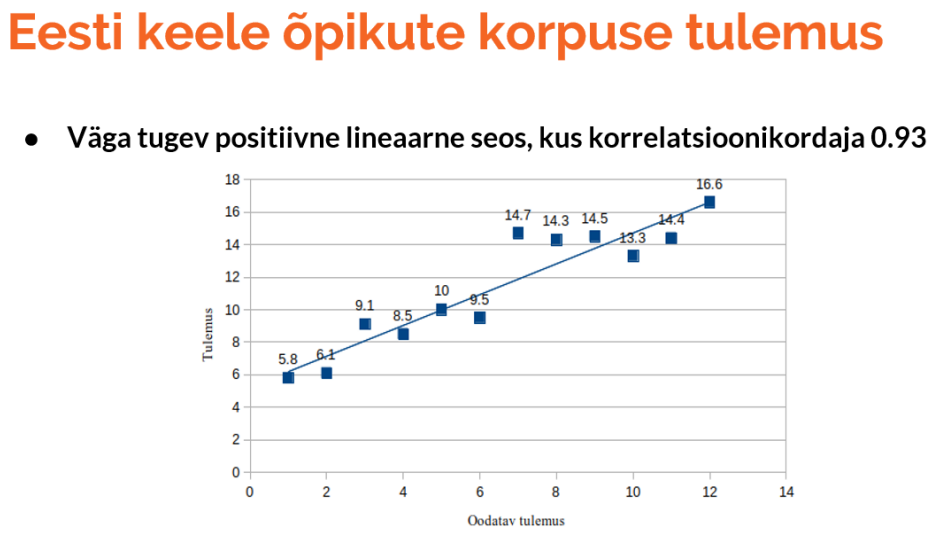

Otsib järgnevalt kõige raskemini ja kergemini loetavad laused iga presidendi jaoks:

In [139]:
import heapq
for president, text in texts:
  gfog = []
  fres = []

  for sentence in text.sentences:
    try:
      heapq.heappush(gfog, (get_gunning_fog_1_sentence(sentence), sentence))
      heapq.heappush(fres, (get_fres_1_sentence(sentence), sentence))
    except Exception:
      pass
  
  def get_n_of_side_from_heap_for_president_in_stdout(n, president, heap, heap_type, operation, operation_name):
    print(f"presidendi {president} jaoks {n} {operation_name} lauset {heap_type}'i järgi on:")
    print()
    for i, (_, sentence) in enumerate(operation(n, heap)):
      print(" ".join(sentence.text))
    print()
    print()

  get_n_of_side_from_heap_for_president_in_stdout(5, president, gfog, "Gunning FOG", heapq.nlargest, "kõige raskemat")
  get_n_of_side_from_heap_for_president_in_stdout(5, president, gfog, "Gunning FOG", heapq.nsmallest, "kõige lihtsamat")
  get_n_of_side_from_heap_for_president_in_stdout(5, president, fres, "FRES", heapq.nsmallest, "kõige raskemat")
  get_n_of_side_from_heap_for_president_in_stdout(5, president, fres, "FRES", heapq.nlargest, "kõige lihtsamat")
  print()
  print()


presidendi Kersti Kaljuraid jaoks 5 kõige raskemat lauset Gunning FOG'i järgi on:

Nõudlik rahulolematus ja samas usk , et homne päev on tänasest parem , kui kõvasti tööd teeme – see oli siis ja on praegugi võti , mis avab ukse me paremasse tulevikku ja aitab seletada kiiret arengut viimase veerandsajandi jooksul , mil me oleme jälle saanud ise oma maal otsustada .
Ma loodan , et rahaliste võimaluste ja antud lubaduste tasakaalustamise tunnil – ja see tund tuleb eredas märtsipäikeses , mil valimiste võitja hakkab kokku panema uut valitsust – saaks tõrjutud needki varjud , mis täna ei lase Eestil veel olla päriselt meie unistuste riik .
Riigi väärikusele mõjub laastavalt , kui kohalik omavalitsus , kelle vahetu kohus ligimese märkamine meie seaduste järgi just ongi , ei võta vastutust oma inimeste eest raskel hetkel , ei aita seista inimeste väärikuse eest , olles parematel aegadel võtnud vastu nende maksud .
Kui riik suhtub nõnda , et kriisi ei pruugi kunagi tulla , tormituuled võivad 

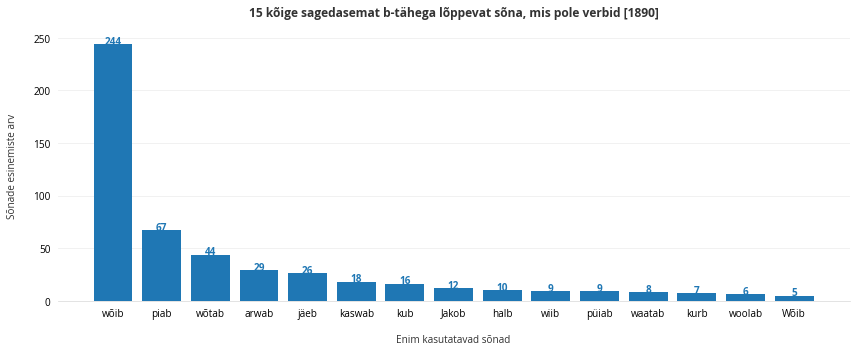

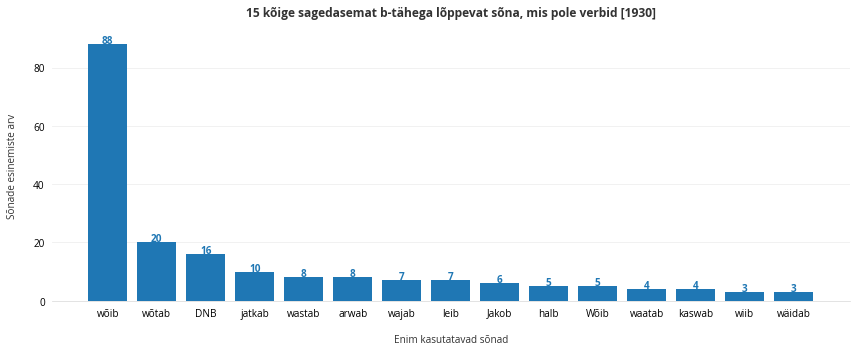

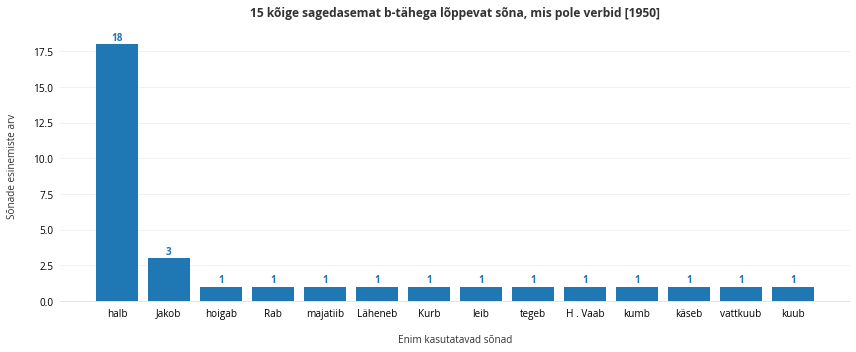

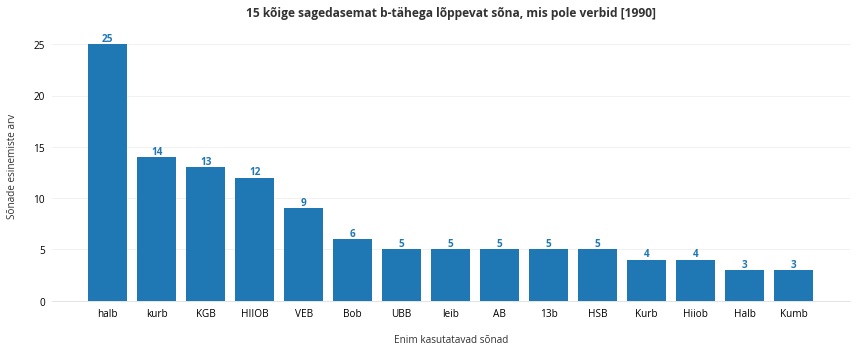

In [ ]:
for year, result in top_occurances:
  # Use the newly integrated Roboto font family for all text.
  plot_data(year, result, "15 kõige sagedasemat b-tähega lõppevat sõna, mis pole verbid")

Iga faili kohta moodusta b-lõpuliste sõnade 15 kõige sagedasemat tekstisõna


In [ ]:
from collections import Counter

def top_15_ends_with_b(data):
  return Counter([x.text for x in data if re.match(r".+[bB]$", x.text)]).most_common(15)

top_occurances = [
  (
    year,
    top_15_ends_with_b(text.words)
  ) for year, text in texts
]


Visualiseerime tulemused

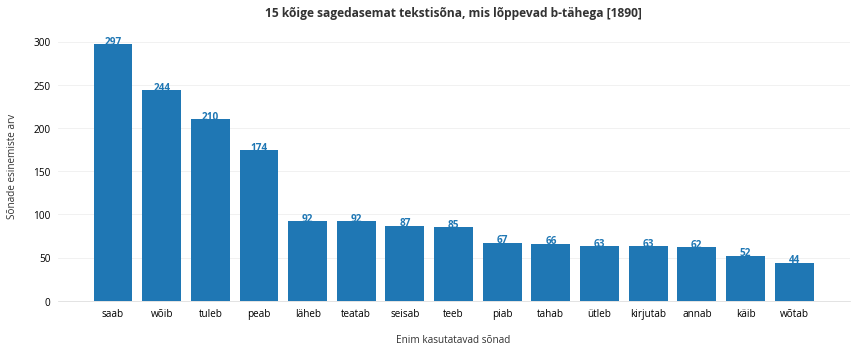

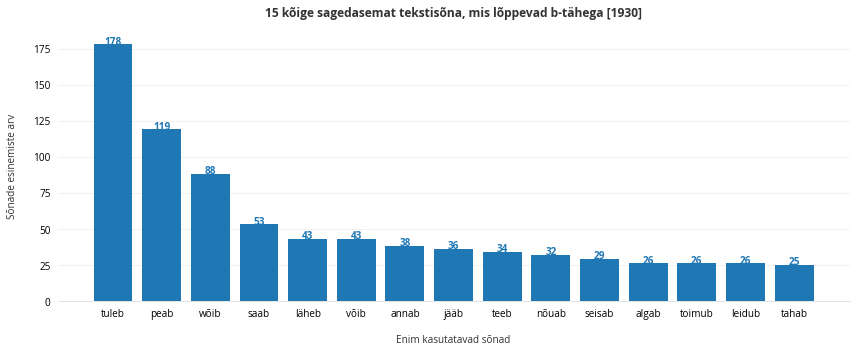

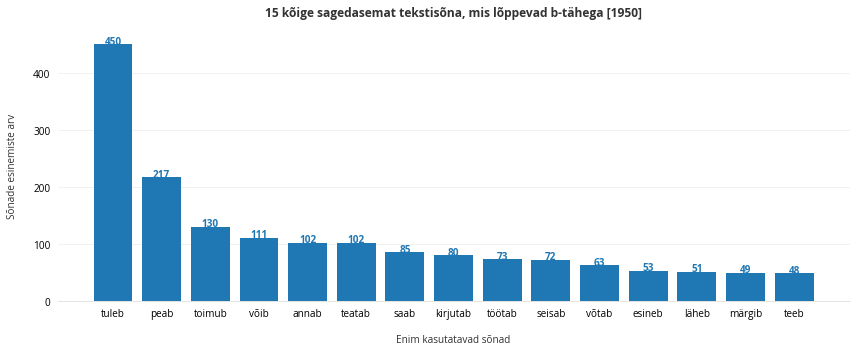

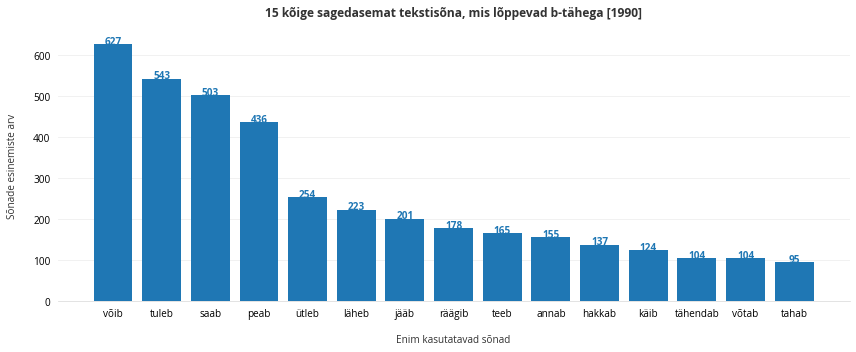

In [ ]:
for year, result in top_occurances:
  # Use the newly integrated Roboto font family for all text.
  plot_data(year, result, "15 kõige sagedasemat tekstisõna, mis lõppevad b-tähega")

Verbid, mis lõppevad b-tähega

In [ ]:
global_total_occurences = 0
global_guessed_right = 0

def get_percentage(text):
  global global_total_occurences
  global global_guessed_right
  total_occurences = 0
  guessed_right = 0
  for item in text.morph_analysis:
    if "V" in item.partofspeech:
      global_total_occurences += 1
      total_occurences += 1
      if re.match(r".+[bB]$", item.text):
        global_guessed_right += 1
        guessed_right += 1
      
  return round(100 * (guessed_right / total_occurences), 2)

[print(f"Aastal {year} oli {get_percentage(text)}% verbid b-tähega lõppevad.") for year, text in texts]
print(f"Aastate peale keskmiselt olid {round(100 * (global_guessed_right / global_total_occurences), 2)}% verbid b-tähega lõppevad.")

Aastal 1890 oli 9.77% verbid b-tähega lõppevad.
Aastal 1930 oli 11.66% verbid b-tähega lõppevad.
Aastal 1950 oli 12.58% verbid b-tähega lõppevad.
Aastal 1990 oli 14.24% verbid b-tähega lõppevad.
Aastate peale keskmiselt olid 12.74% verbid b-tähega lõppevad.


Hinnang:

Lõppkokkuvõteks ilmnes, et vanad eesti sõnad, nagu `wõib`, `piab`, `wõtab`, `arwab`, `jäeb`, `kaswab`, ... ei ole `estnltk` library arust verbid. Mida oli ka arvata, kuna library on kohandatud ikka kõige viimase keele jaoks.

Aga kui keele muutus toimus, mille jaoks ka `estnltk` seadistatud on - ~99% b-tähega sõnadest on verbid. Aga vähesed verbid lõppevad b tähega, kuna käänded eksisteerivad.

Lõppkokkuvõtteks on keeleteadlased oletuse imelikult püstitanud. Kuna suure osa verbe EI saa tuvastada tekstist sõnalõpu järgi, kuna ~90% verbidest ei lõppe b-tähega. AGA kui püstitada oletus nii, et suur osa b-tähega lõppevad sõnad on verbid - see on juba parem oletus.
